# 🎨 BIC in a network?
This Jupyter tries to find a BIC in a network

In [1]:
import matplotlib.pyplot as plt
import numpy as np


from complex_network.components.link import Link
from complex_network.components.node import Node
from complex_network.networks.network import Network
from complex_network.networks import network_factory
from complex_network.networks.network_spec import NetworkSpec

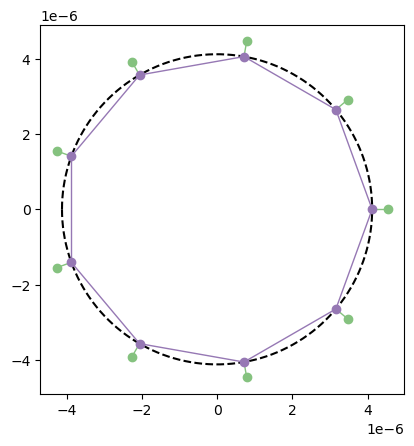

In [2]:
lambda0 = 600e-9  # target wavelength for topological resonance
k0 = 2 * np.pi / lambda0  # target wavenumber for topological resonance
nb = 5  # order number along an edge
num_edge = 9
edge_length = nb * np.pi / k0
r_inscribed = edge_length * 1 / np.tan(np.pi / num_edge)


internal_node_x = r_inscribed * np.cos(
    np.linspace(0, 2 * np.pi, num_edge, endpoint=False)
)
internal_node_y = r_inscribed * np.sin(
    np.linspace(0, 2 * np.pi, num_edge, endpoint=False)
)

external_node_x = (
    1.1
    * r_inscribed
    * np.cos(np.linspace(0, 2 * np.pi, num_edge, endpoint=False))
)
external_node_y = (
    1.1
    * r_inscribed
    * np.sin(np.linspace(0, 2 * np.pi, num_edge, endpoint=False))
)

node_dict = {}
link_dict = {}

for ii in range(num_edge):
    node_dict[ii] = Node(
        ii, "internal", (internal_node_x[ii], internal_node_y[ii])
    )
    link_dict[ii] = Link(ii, "internal", (ii, (ii + 1) % num_edge))

for ii in range(num_edge):
    node_dict[num_edge + ii] = Node(
        num_edge + ii, "external", (external_node_x[ii], external_node_y[ii])
    )
    link_dict[num_edge + ii] = Link(
        num_edge + ii, "external", (num_edge + ii, ii)
    )

spec = NetworkSpec(
    network_type="custom",
    network_shape=None,
    node_dict=node_dict,
    link_dict=link_dict,
    network_size=r_inscribed
)

network = network_factory.generate_network(spec)

network.draw(
    equal_aspect=True,
    highlight_links=[],
    show_external_indices=False,
    show_indices=False,
    highlight_nodes=[],
    draw_boundary=spec.network_size
)

/tmp/ipykernel_1943522/1863379942.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  detS[jj] = np.linalg.det(S)


Text(0, 0.5, 'det S')

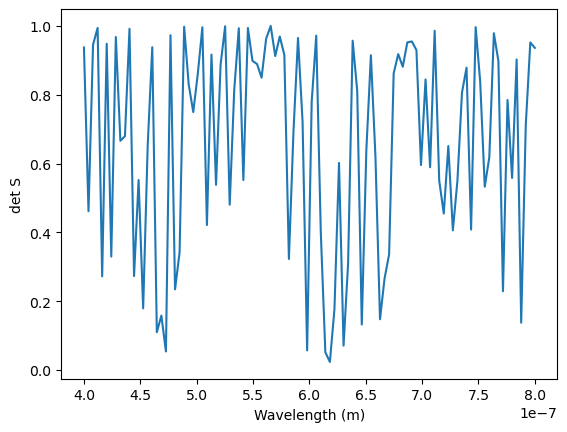

In [3]:
wavelengths = np.linspace(400e-9, 800e-9, 100)
detS = np.zeros((len(wavelengths), 1))

for jj,wl in enumerate(wavelengths):
    S = network.get_S_ee(2*np.pi/wl)
    detS[jj] = np.linalg.det(S)

plt.figure()
plt.plot(wavelengths, np.abs(detS))
plt.xlabel('Wavelength (m)')
plt.ylabel('det S')